In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv('hypothyroid.csv')
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


I can see that there are a lot of boolean values (identified with true and false outputs), some unknown values (identified with '?') and some categorical values (sex, referral source and class columns)

The TBG column seems to have only ? values

In [3]:
#let's explore the dataset
df.head(8).T

,0,1,2,3,4,5,6,7
age,41,23,46,70,70,18,59,80
sex,F,F,M,F,F,F,F,F
on thyroxine,f,f,f,t,f,t,f,f
query on thyroxine,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f


In [4]:
df.tail(8).T

,3764,3765,3766,3767,3768,3769,3770,3771
age,54,73,19,30,68,74,72,64
sex,M,F,F,F,F,F,M,F
on thyroxine,f,t,f,f,f,f,f,f
query on thyroxine,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f


In [5]:
df.shape

(3772, 30)

I would now check if for TBG there are only ? values and, if yes, address these missing values

In [6]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


for both TBG and TBG measured there is only 1 unique value
and for TBG the top (most frequent) value is ?, meaning that almost all instances of this column are represented by unknown/missing values.

In [7]:
df.describe(include='object').T
#in this case we don't see any change because we don't have object-types

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [8]:
#now let's address the missing values:
df.isna().any()

age                          False
sex                          False
on thyroxine                 False
query on thyroxine           False
on antithyroid medication    False
sick                         False
pregnant                     False
thyroid surgery              False
I131 treatment               False
query hypothyroid            False
query hyperthyroid           False
lithium                      False
goitre                       False
tumor                        False
hypopituitary                False
psych                        False
TSH measured                 False
TSH                          False
T3 measured                  False
T3                           False
TT4 measured                 False
TT4                          False
T4U measured                 False
T4U                          False
FTI measured                 False
FTI                          False
TBG measured                 False
TBG                          False
referral source     

here as result i got false to every column because i had ? values, not NaN values. 

In [9]:
df= pd.read_csv('hypothyroid.csv', na_values='?')
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,NaN,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,NaN,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,NaN,SVI,negative


In [10]:
df.isna().any()

age                           True
sex                           True
on thyroxine                 False
query on thyroxine           False
on antithyroid medication    False
sick                         False
pregnant                     False
thyroid surgery              False
I131 treatment               False
query hypothyroid            False
query hyperthyroid           False
lithium                      False
goitre                       False
tumor                        False
hypopituitary                False
psych                        False
TSH measured                 False
TSH                           True
T3 measured                  False
T3                            True
TT4 measured                 False
TT4                           True
T4U measured                 False
T4U                           True
FTI measured                 False
FTI                           True
TBG measured                 False
TBG                           True
referral source     

In [11]:
df.isna().sum(axis=0)

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
Class         

we can see that TBG has 3772/3772 missing values (so only missing values)

we can drop directly the column (ignore the tuple), using axis=1 because we operate along a column

In [12]:
df.drop(columns='TBG', inplace=True)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,f,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,...,2.1,t,124.0,t,1.08,t,114.0,f,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,...,1.8,t,112.0,t,1.07,t,105.0,f,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,...,2.0,t,82.0,t,0.94,t,87.0,f,SVI,negative


In [13]:
df.value_counts(['TBG measured'])

TBG measured
f               3772
Name: count, dtype: int64

In [14]:
df['TBG measured'].unique()

array(['f'], dtype=object)

We just saw twice that TBG measured is always the same, always F value (it has just one unique value), so it's not very useful in out exploratory analysis or to indent something. we can drop this column.

In [15]:
df.drop(columns='TBG measured', inplace=True)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,2.1,t,124.0,t,1.08,t,114.0,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,1.8,t,112.0,t,1.07,t,105.0,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,2.0,t,82.0,t,0.94,t,87.0,SVI,negative


In [16]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


In [17]:
df.describe(include='object')

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,referral source,Class
count,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,5,4
top,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,other,negative
freq,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3676,3771,3588,3403,3003,3541,3385,3387,2201,3481


In [18]:
df.describe(include='all')

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class
count,3771.000000,3622,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3003.000000,3772,3541.000000,3772,3385.000000,3772,3387.000000,3772,3772
unique,NaN,2,2,2,2,2,2,2,2,2,...,2,NaN,2,NaN,2,NaN,2,NaN,5,4
top,NaN,F,f,f,f,f,f,f,f,f,...,t,NaN,t,NaN,t,NaN,t,NaN,other,negative
freq,NaN,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3003,NaN,3541,NaN,3385,NaN,3387,NaN,2201,3481
mean,51.735879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.013500,NaN,108.319345,NaN,0.995000,NaN,110.469649,NaN,NaN
std,20.084958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.827434,NaN,35.604248,NaN,0.195457,NaN,33.089698,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.050000,NaN,2.000000,NaN,0.250000,NaN,2.000000,NaN,NaN
25%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.600000,NaN,88.000000,NaN,0.880000,NaN,93.000000,NaN,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,NaN,103.000000,NaN,0.980000,NaN,107.000000,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.400000,NaN,124.000000,NaN,1.080000,NaN,124.000000,NaN,NaN


<Axes: title={'center': 'age'}, xlabel='Class'>

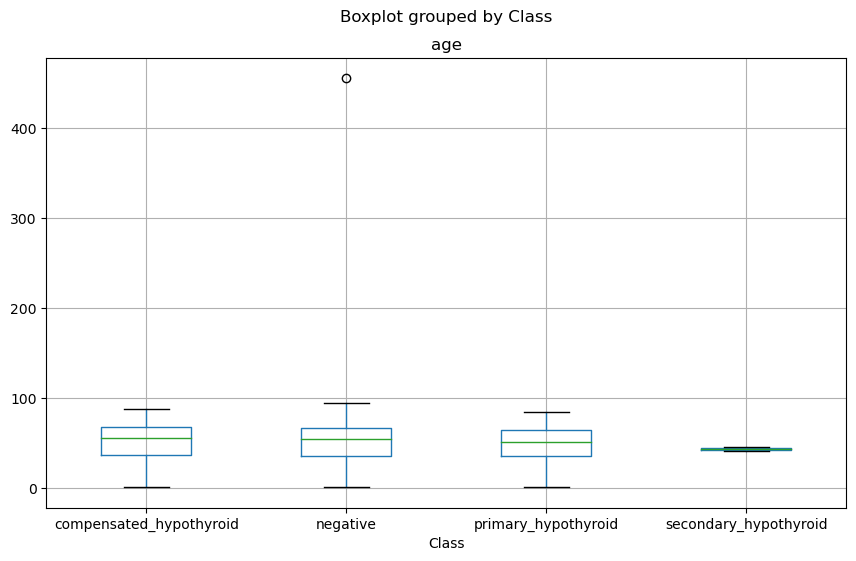

In [19]:
df.boxplot(column='age', by='Class', figsize=(10,6))

<Axes: >

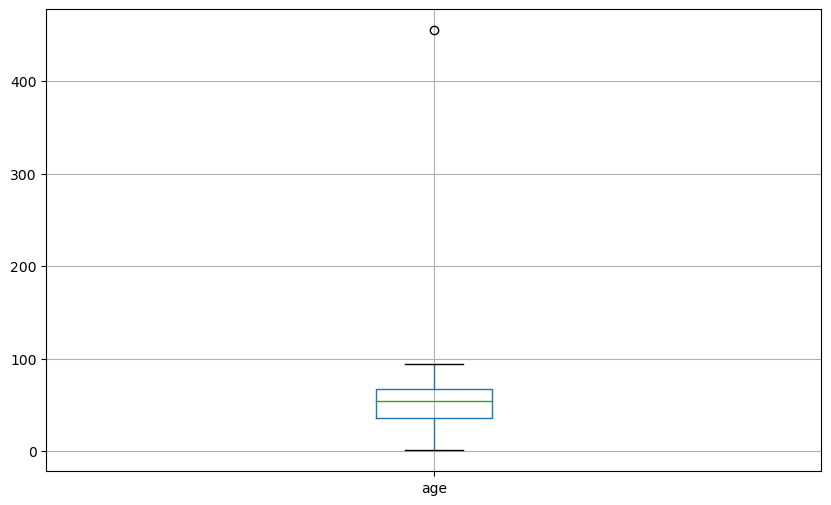

In [20]:
df.boxplot(column='age', figsize=(10,6))

we can see that we are full of NaN values and this makes very complex to obtain some statistics even for numerical columns like T3 and TT4.
Let's try to fill AUTOMATICALLY these missing values

In [21]:
df.isna().values.any()

True

In [22]:
df.isna().sum(axis=0)

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
referral source                0
Class                          0
dtype: int64

In [23]:
df.age.fillna('NS').value_counts()

age
59.0     95
60.0     91
70.0     90
73.0     81
55.0     81
         ..
4.0       1
5.0       1
455.0     1
6.0       1
NS        1
Name: count, Length: 94, dtype: int64

In [24]:
df.set_index('age', inplace=True)
df

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class
age,,,,,,,,,,,,,,,,,,,,,
41.0,F,f,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
23.0,F,f,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
46.0,M,f,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
70.0,F,t,f,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
70.0,F,f,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30.0,F,f,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
68.0,F,f,f,f,f,f,f,f,f,f,...,t,2.1,t,124.0,t,1.08,t,114.0,SVI,negative
74.0,F,f,f,f,f,f,f,f,f,t,...,t,1.8,t,112.0,t,1.07,t,105.0,other,negative


In [25]:
df.loc[455.0]

sex                                 F
on thyroxine                        f
query on thyroxine                  f
on antithyroid medication           f
sick                                f
pregnant                            f
thyroid surgery                     f
I131 treatment                      f
query hypothyroid                   f
query hyperthyroid                  f
lithium                             f
goitre                              f
tumor                               f
hypopituitary                       f
psych                               f
TSH measured                        t
TSH                               1.1
T3 measured                         t
T3                                2.0
TT4 measured                        t
TT4                             118.0
T4U measured                        t
T4U                              1.13
FTI measured                        t
FTI                             104.0
referral source                   SVI
Class       

it's impossible to have 455 as age, so it's an erroneous data/an outlier. To correct it we can:

In [26]:
df.reset_index(inplace=True)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,2.1,t,124.0,t,1.08,t,114.0,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,1.8,t,112.0,t,1.07,t,105.0,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,2.0,t,82.0,t,0.94,t,87.0,SVI,negative


In [27]:
df.age= df.age.replace(455.0, np.nan)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,2.1,t,124.0,t,1.08,t,114.0,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,1.8,t,112.0,t,1.07,t,105.0,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,2.0,t,82.0,t,0.94,t,87.0,SVI,negative


In [28]:
df.age.fillna(df.age.mean(), inplace=True)

In [29]:
df.isna().sum()

age                            0
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
referral source                0
Class                          0
dtype: int64

<Axes: >

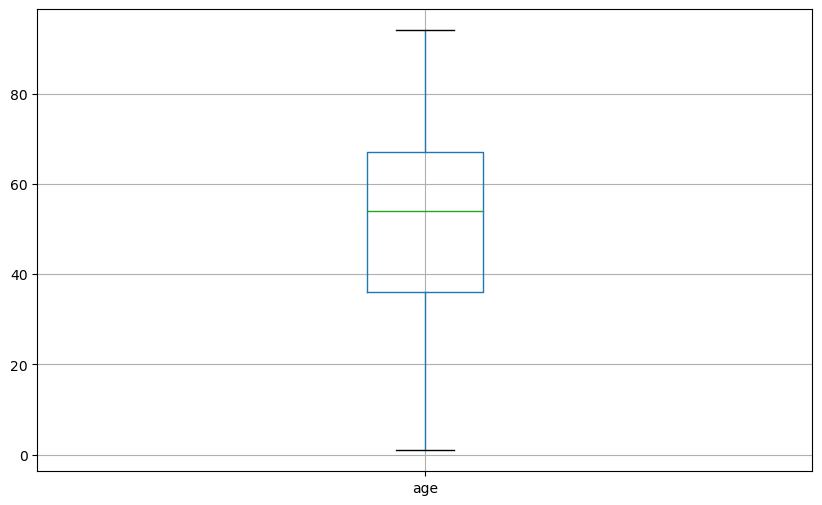

In [49]:
df.boxplot(column='age', figsize= (10,6))

In [30]:
df.sex.mode()

0    F
Name: sex, dtype: object

In [31]:
df.value_counts(['sex'])

sex
F      2480
M      1142
Name: count, dtype: int64

In [32]:
df.sex.fillna(df.sex.mode()[0], inplace=True)

!! we have to specify [0] because we have a Series that contains all the modes, so we want to take the first mode encountered!!

In [33]:
df.isna().sum()

age                            0
sex                            0
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
referral source                0
Class                          0
dtype: int64

In [34]:
df.TSH.fillna(df.TSH.mean(), inplace=True)
df.T3.fillna(df.T3.mean(), inplace=True)
df.TT4.fillna(df.TT4.mean(), inplace=True)
df.T4U.fillna(df.T4U.mean(), inplace=True)
df.FTI.fillna(df.FTI.mean(), inplace=True)

In [35]:
df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
referral source              0
Class                        0
dtype: int64

In [36]:
df[(df['age']<=50) & df['Class']=='positive']

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class


In [37]:
df[(df['age']>=50.0) & df['Class']=='compensated_hypothyroid']

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class


In [38]:
df.Class.value_counts()

Class
negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: count, dtype: int64

In [39]:
df.set_index('Class')

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source
Class,,,,,,,,,,,,,,,,,,,,,
negative,41.0,F,f,f,f,f,f,f,f,f,...,1.300000,t,2.5000,t,125.000000,t,1.140,t,109.000000,SVHC
negative,23.0,F,f,f,f,f,f,f,f,f,...,4.100000,t,2.0000,t,102.000000,f,0.995,f,110.469649,other
negative,46.0,M,f,f,f,f,f,f,f,f,...,0.980000,f,2.0135,t,109.000000,t,0.910,t,120.000000,other
negative,70.0,F,t,f,f,f,f,f,f,f,...,0.160000,t,1.9000,t,175.000000,f,0.995,f,110.469649,other
negative,70.0,F,f,f,f,f,f,f,f,f,...,0.720000,t,1.2000,t,61.000000,t,0.870,t,70.000000,SVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
negative,30.0,F,f,f,f,f,f,f,f,f,...,5.086766,f,2.0135,f,108.319345,f,0.995,f,110.469649,other
negative,68.0,F,f,f,f,f,f,f,f,f,...,1.000000,t,2.1000,t,124.000000,t,1.080,t,114.000000,SVI
negative,74.0,F,f,f,f,f,f,f,f,f,...,5.100000,t,1.8000,t,112.000000,t,1.070,t,105.000000,other


In [40]:
df.reset_index(inplace=True)
df

,index,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class
0,0,41.0,F,f,f,f,f,f,f,f,...,t,2.5000,t,125.000000,t,1.140,t,109.000000,SVHC,negative
1,1,23.0,F,f,f,f,f,f,f,f,...,t,2.0000,t,102.000000,f,0.995,f,110.469649,other,negative
2,2,46.0,M,f,f,f,f,f,f,f,...,f,2.0135,t,109.000000,t,0.910,t,120.000000,other,negative
3,3,70.0,F,t,f,f,f,f,f,f,...,t,1.9000,t,175.000000,f,0.995,f,110.469649,other,negative
4,4,70.0,F,f,f,f,f,f,f,f,...,t,1.2000,t,61.000000,t,0.870,t,70.000000,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,3767,30.0,F,f,f,f,f,f,f,f,...,f,2.0135,f,108.319345,f,0.995,f,110.469649,other,negative
3768,3768,68.0,F,f,f,f,f,f,f,f,...,t,2.1000,t,124.000000,t,1.080,t,114.000000,SVI,negative
3769,3769,74.0,F,f,f,f,f,f,f,f,...,t,1.8000,t,112.000000,t,1.070,t,105.000000,other,negative
3770,3770,72.0,M,f,f,f,f,f,f,f,...,t,2.0000,t,82.000000,t,0.940,t,87.000000,SVI,negative


# PLOTTING

<Axes: >

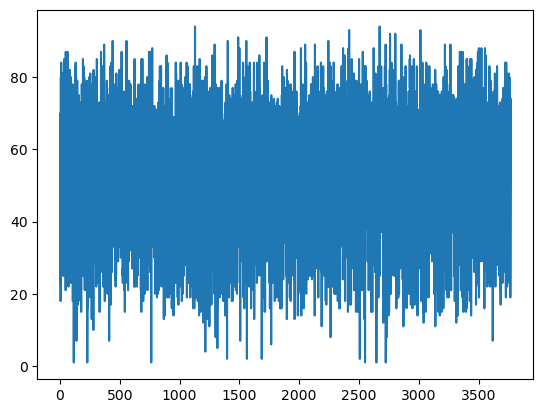

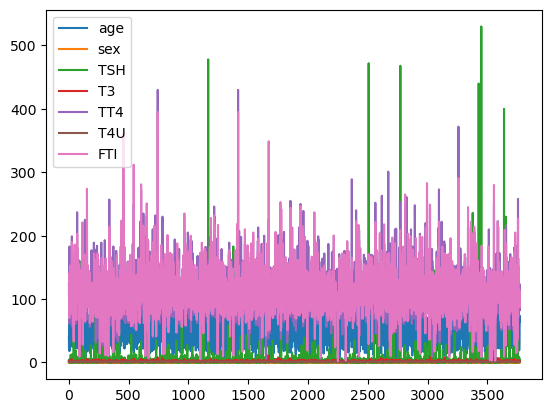

In [50]:
df.drop('index', axis=1, inplace=True)
df.age.plot()
df.plot()

<Axes: title={'center': 'relationship between age and class'}, xlabel='age', ylabel='Class'>

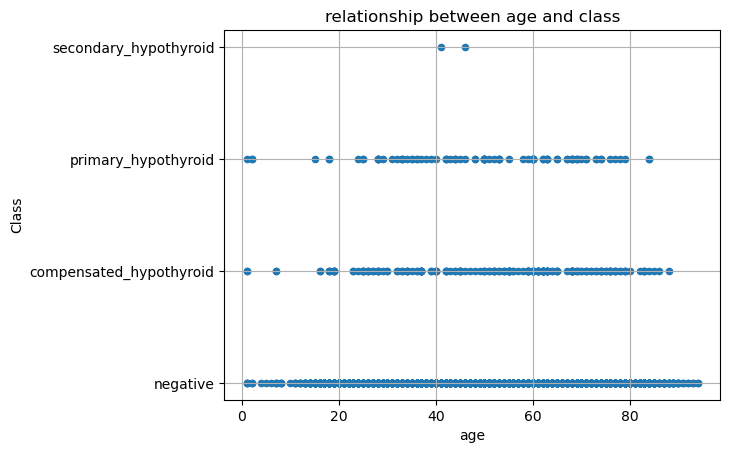

In [42]:
df.plot(kind='scatter',
       x='age',
       y='Class',
       title='relationship between age and class',
       grid=True)

<Axes: title={'center': 'histogram for age'}, ylabel='Frequency'>

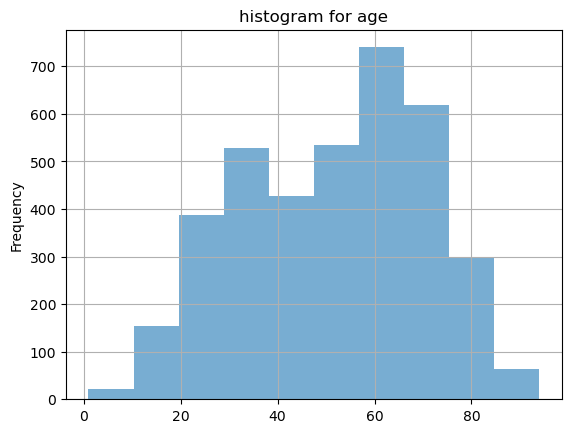

In [43]:
df['age'].plot(kind='hist',
              title='histogram for age',
              grid=True,
              alpha=0.6)

In [51]:
df.age.max()

94.0

In [52]:
df.age.describe()

count    3772.000000
mean       51.628912
std        18.977955
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max        94.000000
Name: age, dtype: float64

In [44]:
df.sex.replace('F', 0, inplace=True)
df.sex.replace('M', 1, inplace=True)
df

,index,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class
0,0,41.0,0,f,f,f,f,f,f,f,...,t,2.5000,t,125.000000,t,1.140,t,109.000000,SVHC,negative
1,1,23.0,0,f,f,f,f,f,f,f,...,t,2.0000,t,102.000000,f,0.995,f,110.469649,other,negative
2,2,46.0,1,f,f,f,f,f,f,f,...,f,2.0135,t,109.000000,t,0.910,t,120.000000,other,negative
3,3,70.0,0,t,f,f,f,f,f,f,...,t,1.9000,t,175.000000,f,0.995,f,110.469649,other,negative
4,4,70.0,0,f,f,f,f,f,f,f,...,t,1.2000,t,61.000000,t,0.870,t,70.000000,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,3767,30.0,0,f,f,f,f,f,f,f,...,f,2.0135,f,108.319345,f,0.995,f,110.469649,other,negative
3768,3768,68.0,0,f,f,f,f,f,f,f,...,t,2.1000,t,124.000000,t,1.080,t,114.000000,SVI,negative
3769,3769,74.0,0,f,f,f,f,f,f,f,...,t,1.8000,t,112.000000,t,1.070,t,105.000000,other,negative
3770,3770,72.0,1,f,f,f,f,f,f,f,...,t,2.0000,t,82.000000,t,0.940,t,87.000000,SVI,negative


<Axes: title={'center': 'relationship between age and class'}, ylabel='Frequency'>

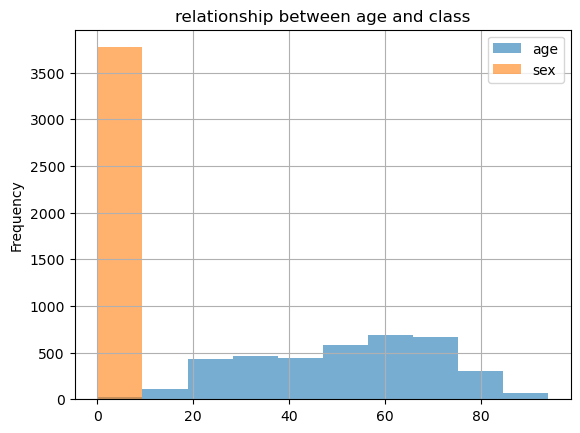

In [45]:
df[['age', 'sex']].plot(kind='hist',
                         title='relationship between age and class',
                         grid=True,
                         alpha=0.6)

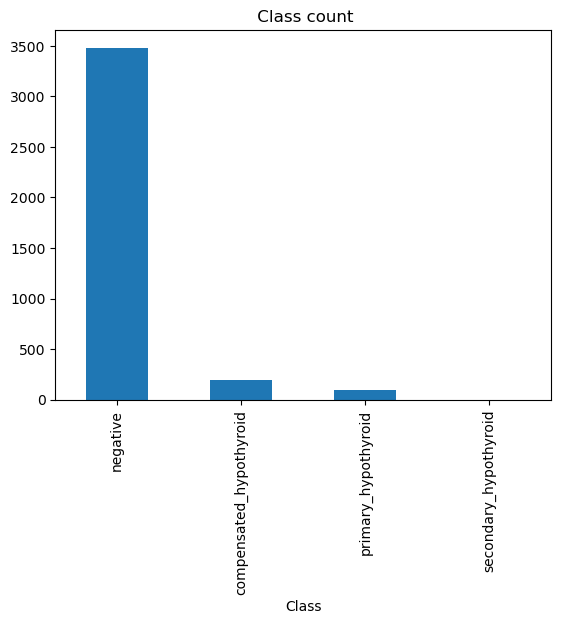

In [46]:
count= df['Class'].value_counts()
count.plot(kind='bar', title=' Class count')
plt.show()

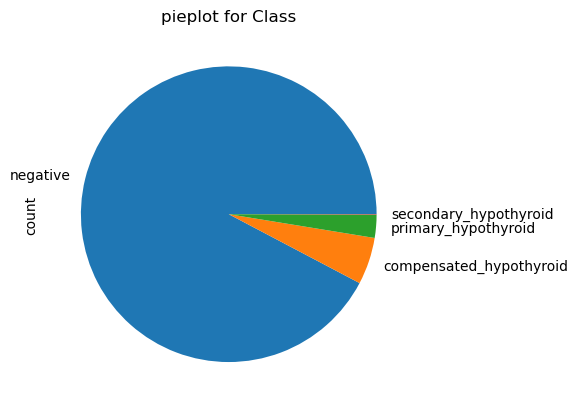

In [47]:
count.plot(kind='pie', title='pieplot for Class')
plt.show()

<Axes: title={'center': 'age'}, xlabel='Class'>

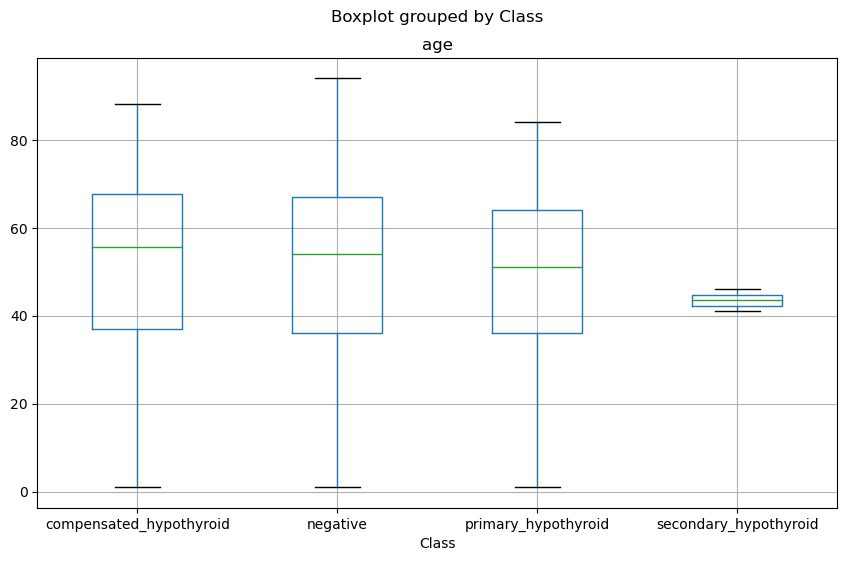

In [48]:
df.boxplot(column='age', by='Class', figsize= (10,6))

<Axes: title={'center': 'histogram for the thyroid hormones'}, ylabel='Frequency'>

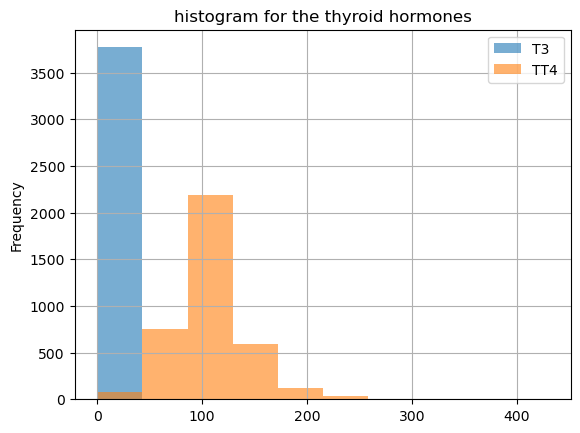

In [53]:
df[['T3', 'TT4']].plot(kind='hist',
                      title='histogram for the thyroid hormones',
                      grid=True,
                      alpha=0.6)

In [54]:
df[['T3', 'TT4']].describe()

,T3,TT4
count,3772.000000,3772.000000
mean,2.013500,108.319345
std,0.738262,34.496511
min,0.050000,2.000000
25%,1.700000,89.000000
50%,2.013500,106.000000
75%,2.200000,123.000000
max,10.600000,430.000000


In [55]:
df[['T3', 'TSH']].describe()

,T3,TSH
count,3772.000000,3772.000000
mean,2.013500,5.086766
std,0.738262,23.290853
min,0.050000,0.005000
25%,1.700000,0.600000
50%,2.013500,1.600000
75%,2.200000,3.800000
max,10.600000,530.000000


<Axes: title={'center': 'histogram to see the relationship between the precursor and thyroid hormone'}, ylabel='Frequency'>

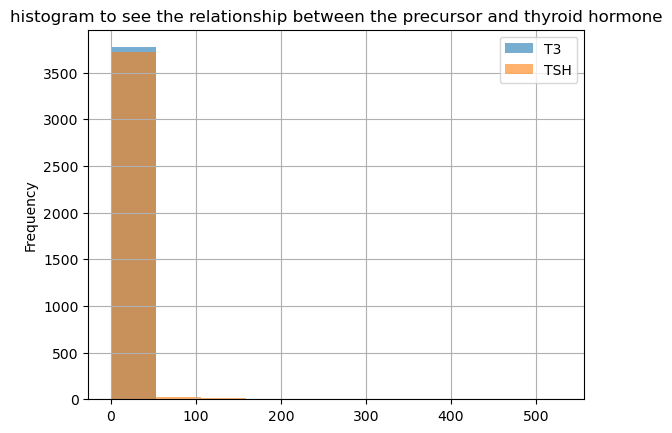

In [56]:
df[['T3', 'TSH']].plot(kind='hist',
                      grid=True,
                      alpha=0.6,
                      title='histogram to see the relationship between the precursor and thyroid hormone')

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

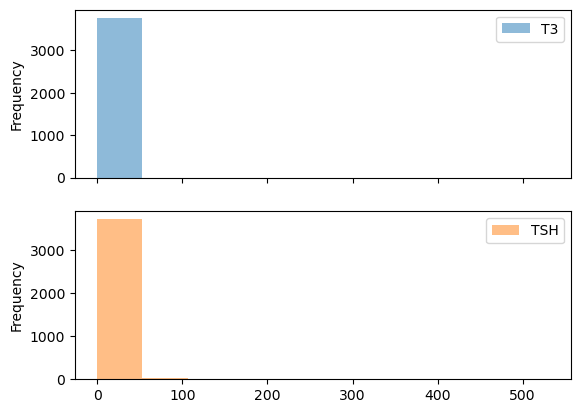

In [57]:
df[['T3', 'TSH']].plot.hist(subplots=True, alpha=0.5)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

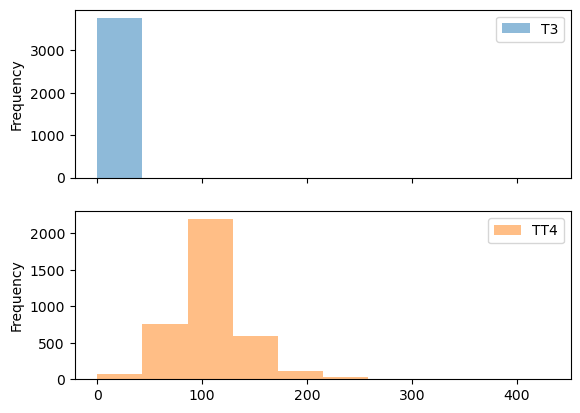

In [58]:
df[['T3', 'TT4']].plot.hist(subplots=True, alpha=0.5)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

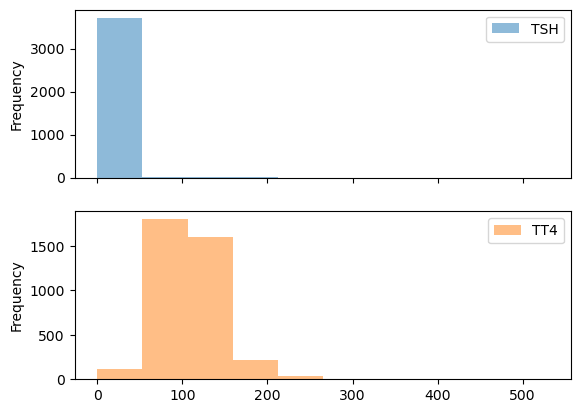

In [59]:
df[['TSH', 'TT4']].plot.hist(subplots=True, alpha=0.5)

T3        Axes(0.125,0.11;0.352273x0.77)
TSH    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

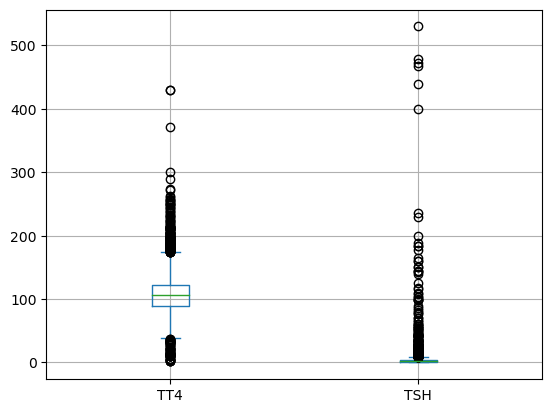

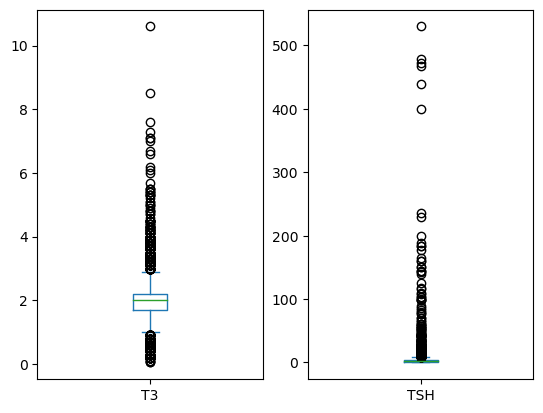

In [64]:
df[['TT4', 'TSH']].plot(kind='box', grid=True)
df[['T3', 'TSH']].plot(kind='box', subplots=True)

In [93]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,3762,3763,3764,3765,3766,3767,3768,3769,3770,3771
age,41.0,23.0,46.0,70.0,70.0,18.0,59.0,80.0,66.0,68.0,...,61.0,41.0,54.0,73.0,19.0,30.0,68.0,74.0,72.0,64.0
sex,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
on thyroxine,f,f,f,t,f,t,f,f,f,f,...,f,f,f,t,f,f,f,f,f,f
query on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f


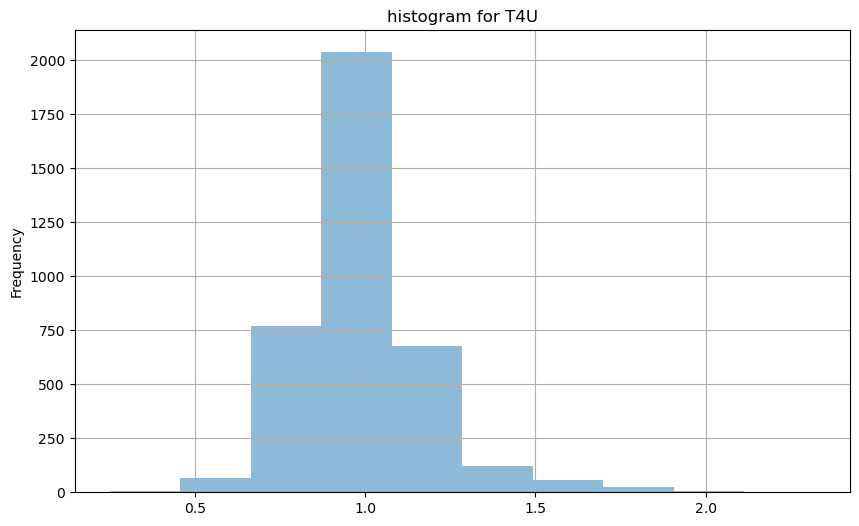

In [80]:
df['T4U'].plot(kind='hist',
                          grid=True,
                          alpha=0.5,
                          figsize=(10,6),
                          title='histogram for T4U')
plt.show()

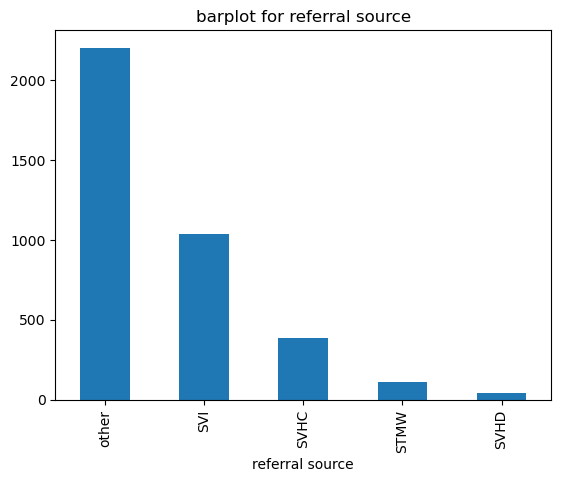

In [81]:
count= df['referral source'].value_counts()
count.plot(kind='bar', title='barplot for referral source')
plt.show()

In [82]:
import seaborn as sns

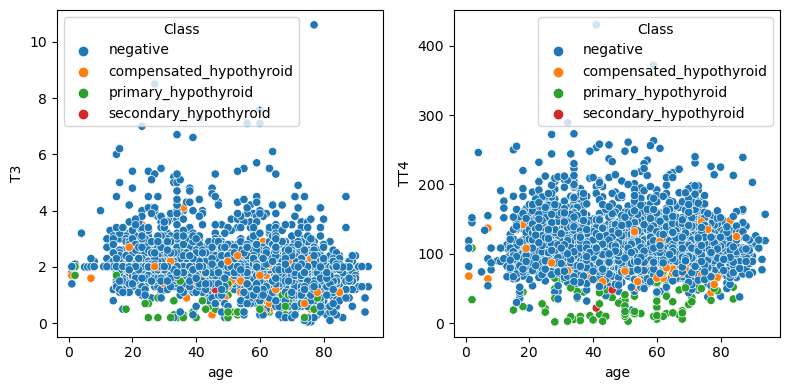

In [88]:
f, axes= plt.subplots(1,2, figsize=(8,4))

sns.scatterplot(data=df,
               x='age',
               y='T3',
               hue='Class',
               ax=axes[0])

sns.scatterplot(data=df,
               x='age',
               y='TT4',
               hue='Class',
               ax=axes[1])

f.tight_layout()

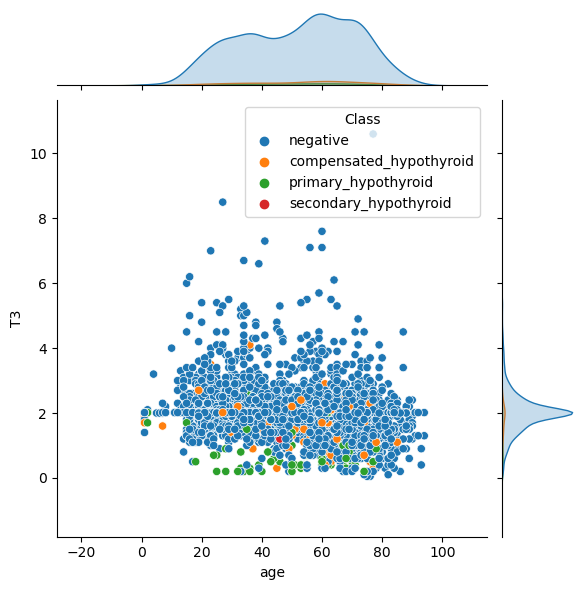

In [94]:
sns.jointplot(data=df, x='age', y='T3', hue='Class')

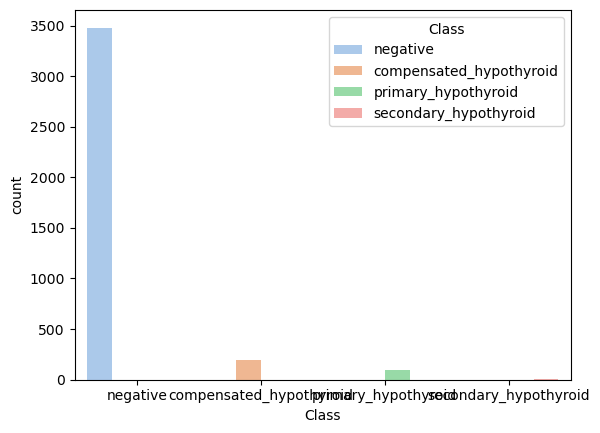

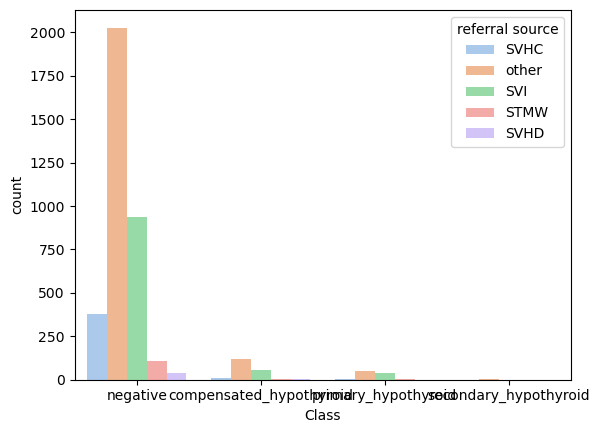

In [97]:
sns.countplot(x='Class', hue='Class', data=df, palette='pastel')
plt.show()
sns.countplot(x='Class', hue='referral source', data=df, palette='pastel')
plt.show()

In [104]:
from scipy.stats import pearsonr

pearsonr(df.TSH, df.T3)
df[['TSH', 'T3']].corr()
df[['TT4','T3']].corrr()

,TT4,T3
TT4,1.000000,0.509065
T3,0.509065,1.000000


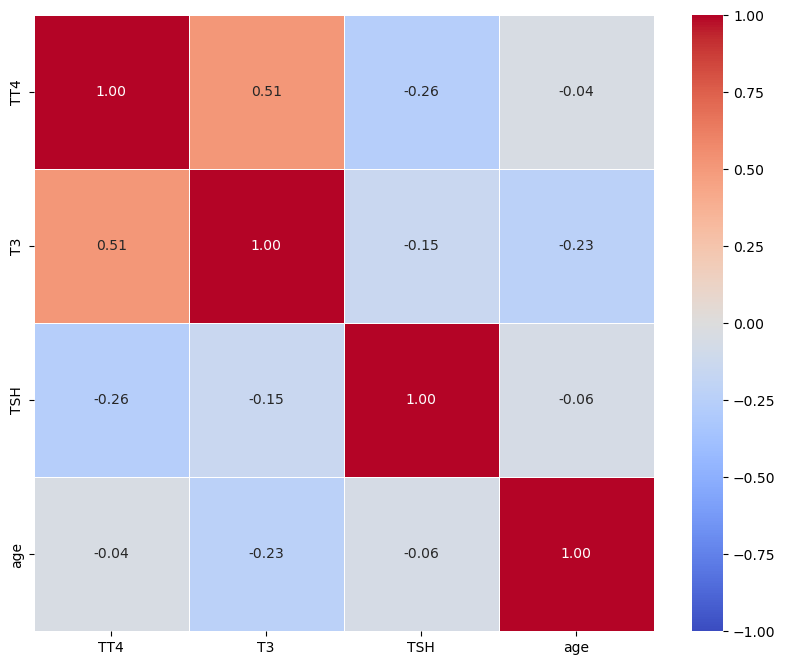

In [107]:
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(df[['TT4','T3', 'TSH', 'age']].corr(),
           annot=True,
           linewidths=.5,
           fmt='.2f',
           ax=ax,
           vmin=-1,            #min value
           vmax=1,             #max value
           cmap='coolwarm')
plt.show()

# KNN CLASSIFICATION

In [196]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()

In [197]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [198]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [199]:
df= pd.DataFrame(iris.data, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [200]:
df.isna().values.any()

False

In [201]:
df.isna().sum(axis=0)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [202]:
df.shape

(150, 4)

In [203]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [204]:
#NEW COLUMN
df['target']= iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [205]:
df[df.target==1].value_counts().sum()

50

In [206]:
print(len(df[df.target==0]))
print(len(df[df.target==1]))
print(len(df[df.target==2]))

50
50
50


In [207]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


let's split the dataframe into 3 different dataframes

In [208]:
df0= df[:50]
df1= df[50:100]
df2= df[100:150]

In [209]:
from matplotlib import pyplot as plt
#or import matplotlib.pyplot as plt

# TRAIN TEST SPLIT

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
X= df.drop(['target'], axis='columns')
y= df.target

In [212]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [213]:
print(len(X_train))
print(len(X_test))

120
30


# CREATE KNN

In [214]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=10) #IDEAL K IS 3
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [215]:
knn.score(X_test, y_test)

0.9666666666666667

In [216]:
from sklearn.metrics import confusion_matrix

y_pred= knn.predict(X_test)  #use X test to find y_predicted
cm=confusion_matrix(y_test, y_pred)  #y_test= truth, y_pred= prediction
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

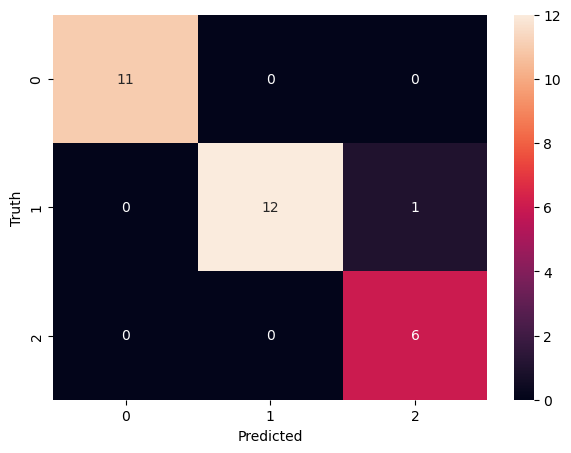

In [217]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

from here we can see that only one value is predicted wrong (which was understandable also by looking at the very high score)

In [218]:
from sklearn.datasets import load_digits
digits= load_digits()

In [219]:
X, y= digits.data, digits.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train))
print(len(X_test))

1437
360


In [220]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

TO TRAIN THE MODEL WE CAN ALSO

In [221]:
from sklearn.svm import SVC
clf= SVC(random_state=0, probability=True).fit(X_train, y_train)
y_pred_prob= clf.predict_proba(X_test)
print(y_pred_prob)

[[4.39114656e-04 9.76080425e-01 2.08948120e-03 ... 1.40205289e-03
  1.36665943e-02 9.42269269e-04]
 [2.35381240e-03 1.07686706e-02 4.97270295e-03 ... 2.09115111e-02
  2.47531678e-02 8.72127255e-03]
 [9.87448658e-01 3.37080693e-04 1.39827284e-03 ... 5.20830034e-04
  1.10177932e-03 1.39063069e-03]
 ...
 [6.06366131e-04 1.26305696e-03 4.78143474e-04 ... 1.53149936e-03
  1.58784762e-03 4.04028151e-04]
 [2.44086237e-04 2.64540971e-03 9.91002351e-01 ... 5.04665144e-04
  6.80193692e-04 6.65611922e-04]
 [7.28732136e-04 7.19884441e-04 1.15448481e-03 ... 1.59524142e-03
  2.36865774e-03 3.44576523e-03]]


In [222]:
knn.score(X_test, y_test)

0.9972222222222222

In [223]:
from sklearn.metrics import confusion_matrix

y_pred= knn.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

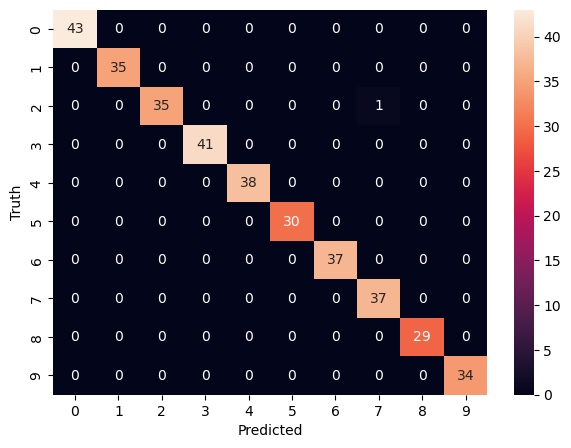

In [224]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [225]:
#ROC CURVE
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.title('ROC CURVE')
plt.show()

ValueError: The target y is not binary. Got multiclass type of target.

C:\Users\chiar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chiar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

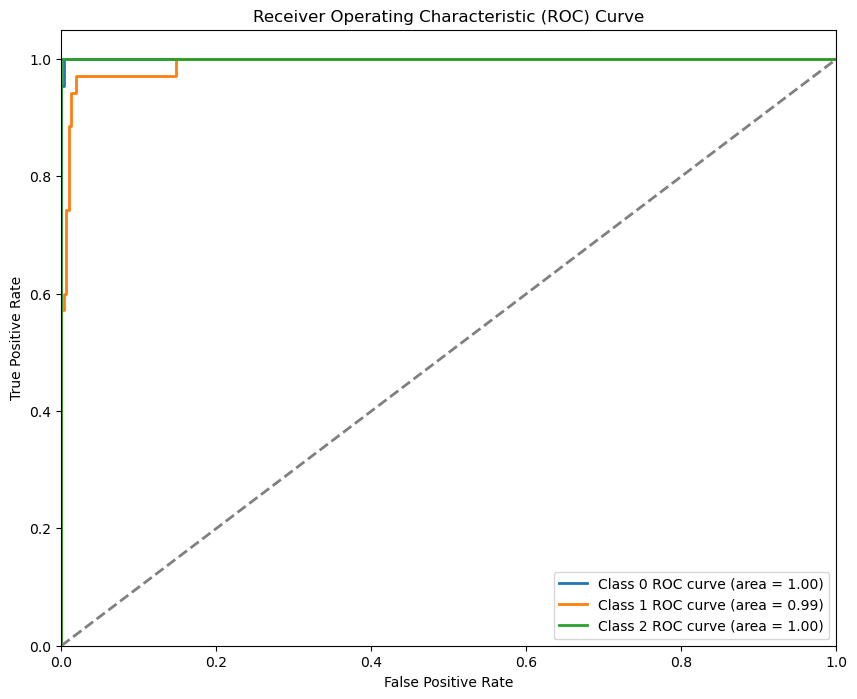

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Train a classifier
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train_bin)

# Get the predicted probabilities for each class
y_score = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()